# Computer Vision - Assignment 2

## 1.Use any feature detector and descriptor (e.g. SIFT) to find matches between two partially overlapping images.

In [17]:
import cv2
import numpy as np
from skimage import filters
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.util.shape import view_as_blocks
from scipy.spatial.distance import cdist
from scipy.ndimage.filters import convolve
from skimage.feature import corner_peaks
from scipy import signal
%matplotlib inline
plt.rcParams['figure.figsize'] = (18.0, 12.0)  # set default size of plots
plt.rcParams['image.cmap'] = 'gray'

**SIFT**  is used to find matches between two overlapping images
1. SIFT stands for Stands for scale invariant feature transform .
1. While Harris corner detector is Roatation invariant,SIFT is predominantly scale invariant
1. Harris has detector and SIFT has both feature **detector** and **descriptor**
1. Similar to the one used in primate visual system (human, ape, monkey, etc.)
1. SIFT is invented by David Lowe

SIFT is invariant to 
1. Affine distortion,
1. Change in 3D viewpoint,
1. Addition of noise,
1. Change in illumination.

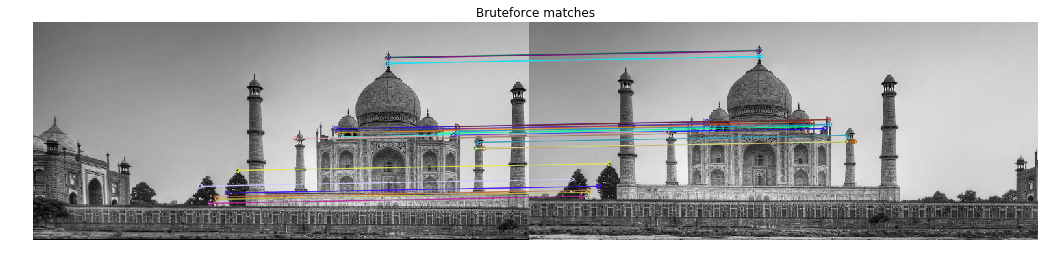

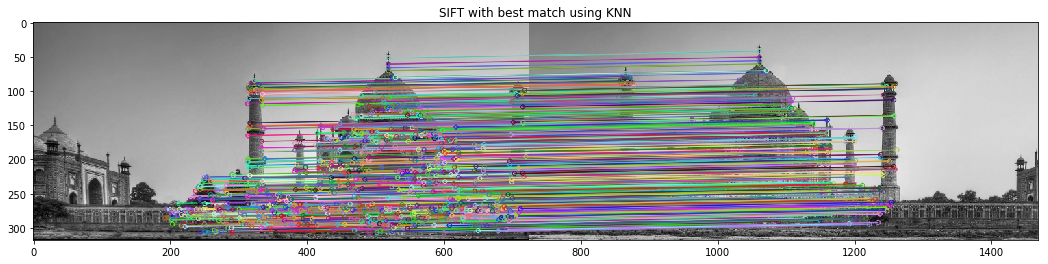

In [18]:
img1 = cv2.imread(r'img2_1.png',0)  # source
img2 = cv2.imread(r'img2_2.png',0) # target

# ORB detector
orb = cv2.ORB_create()

# Find interest points and descriptors with ORB
interest_points1, desc1 = orb.detectAndCompute(img1,None)
interest_points2, desc2 = orb.detectAndCompute(img2,None)

# BFMatcher to find matching pairs
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match the descriptors
matches = bf.match(desc1,desc2)
# Sort per their distance
matches = sorted(matches, key = lambda x:x.distance)

# Number of matches to display
num_of_corners=25

img3 = cv2.drawMatches(img1,interest_points1,img2,interest_points2,matches[:num_of_corners],None, flags=2)
plt.axis('off')
plt.title('Bruteforce matches')
plt.imshow(img3)
plt.show()


# SIFT detector

num_of_corners=40

sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
interest_points1, desc1 = sift.detectAndCompute(img1,None)
interest_points2, desc2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(desc1,desc2, k=2)
# Apply ratio test
good = []
good_without_list = []
for m,n in matches:
    if m.distance < 0.05*n.distance:
        good.append([m])
        good_without_list.append(m)
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,interest_points1,img2,interest_points2,good,None,flags=2)
plt.title('SIFT with best match using KNN')
plt.imshow(img3)
plt.show()

**Other data**

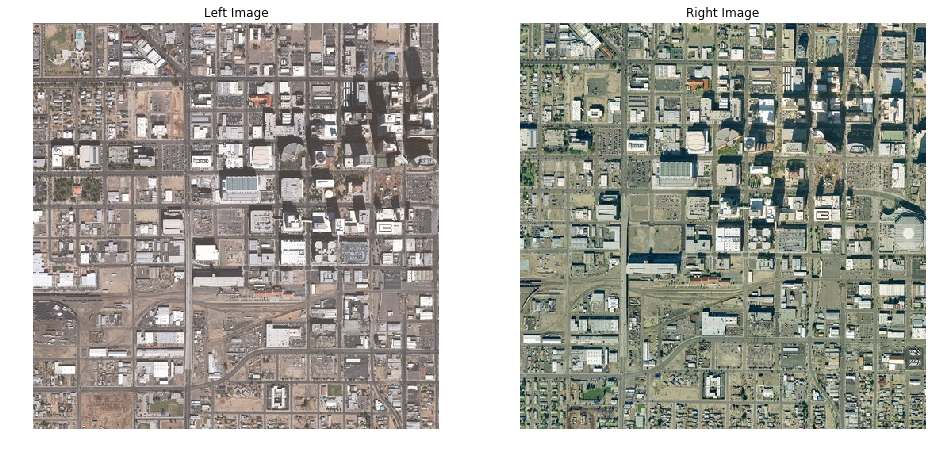

In [54]:
img1 = cv2.imread('Left.jpg')
rgb1 = cv2.cvtColor(img1,cv2.COLOR_RGB2BGR)
gray1 = cv2.cvtColor(rgb1,cv2.COLOR_RGB2GRAY)

img2 = cv2.imread('Right.jpg')
rgb2 = cv2.cvtColor(img2,cv2.COLOR_RGB2BGR)
gray2 = cv2.cvtColor(rgb2,cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(16,12))

# Display corner response
plt.subplot(1,2,1)
plt.imshow(rgb1)
plt.axis('off')
plt.title('Left Image')

plt.subplot(1,2,2)
plt.imshow(rgb2)
plt.axis('off')
plt.title('Right Image')
plt.show()

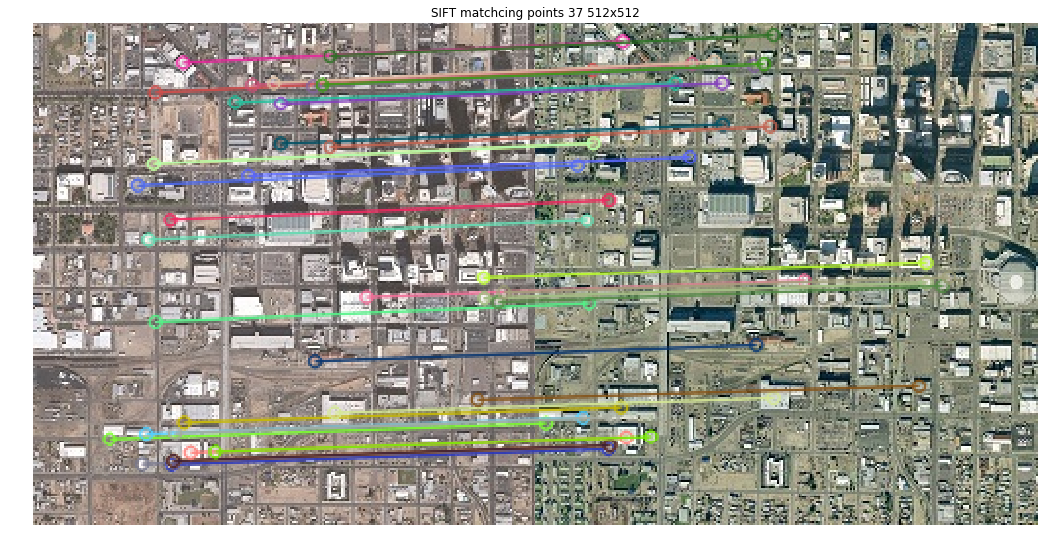

In [69]:
# SIFT detector
sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
interest_points1, desc1 = sift.detectAndCompute(gray1,None)
interest_points2, desc2 = sift.detectAndCompute(gray2,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(desc1,desc2, k=2)
# Apply ratio test
good = []
good_without_list = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append([m])
        good_without_list.append(m)
# cv.drawMatchesKnn expects list of lists as matches.
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags =2)

# Need to draw only good matches, so create a mask
#matchesMask = [[0,0] for i in range(len(matches))]


img3 = cv2.drawMatchesKnn(rgb1,interest_points1,rgb2,interest_points2,good,None,flags=2)
plt.title('SIFT matchcing points ' +str(len(good)) +' 512x512')
plt.axis('off')
plt.imshow(img3)
plt.show()

**SIFT is scale invariant**

It performed decently well when resized from 512x512 to 256x256

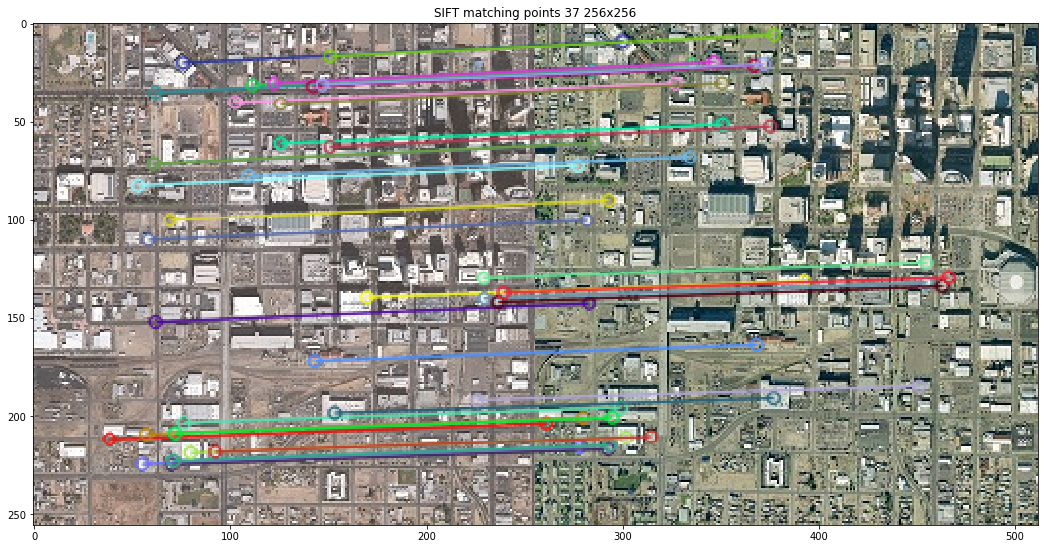

(<matplotlib.image.AxesImage at 0x256e73fb7b8>, None)

In [72]:
img1 = cv2.imread('Left2.jpg')
rgb1 = cv2.cvtColor(img1,cv2.COLOR_RGB2BGR)
gray1 = cv2.cvtColor(rgb1,cv2.COLOR_RGB2GRAY)

img2 = cv2.imread('Right2.jpg')
rgb2 = cv2.cvtColor(img2,cv2.COLOR_RGB2BGR)
gray2 = cv2.cvtColor(rgb2,cv2.COLOR_RGB2GRAY)

# SIFT detector
sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
interest_points1, desc1 = sift.detectAndCompute(gray1,None)
interest_points2, desc2 = sift.detectAndCompute(gray2,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(desc1,desc2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(rgb1,interest_points1,rgb2,interest_points2,good,None,flags=2)
plt.title('SIFT matching points ' +str(len(good))+' 256x256')
plt.imshow(img3),plt.show()

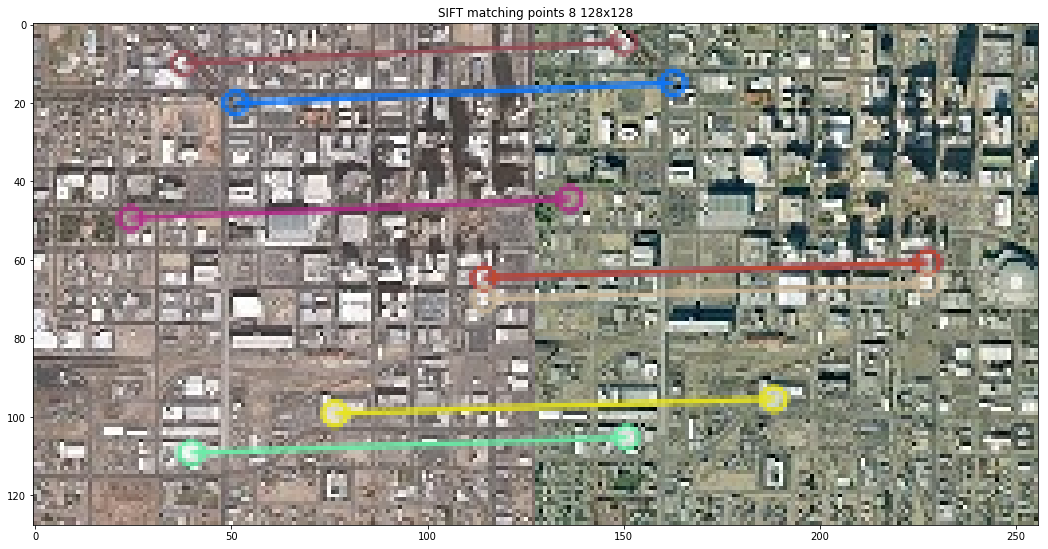

(<matplotlib.image.AxesImage at 0x256e8de9438>, None)

In [73]:
img1 = cv2.imread('Left4.jpg')
rgb1 = cv2.cvtColor(img1,cv2.COLOR_RGB2BGR)
gray1 = cv2.cvtColor(rgb1,cv2.COLOR_RGB2GRAY)

img2 = cv2.imread('Right4.jpg')
rgb2 = cv2.cvtColor(img2,cv2.COLOR_RGB2BGR)
gray2 = cv2.cvtColor(rgb2,cv2.COLOR_RGB2GRAY)

# SIFT detector
sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
interest_points1, desc1 = sift.detectAndCompute(gray1,None)
interest_points2, desc2 = sift.detectAndCompute(gray2,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(desc1,desc2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(rgb1,interest_points1,rgb2,interest_points2,good,None,flags=2)
plt.title('SIFT matching points ' +str(len(good))+' 128x128')
plt.imshow(img3),plt.show()